In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, power_transform, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense

In [2]:
data = pd.read_csv('/home/amirhossein/AI/Datascience/datasets/sbikes', sep='\t', engine='python')
data

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
data.describe()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [4]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [5]:
# sns.pairplot(data);

In [6]:
data.corr()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(�C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(�C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [7]:
import datetime

In [8]:
data['Date'].dtype

dtype('O')

In [9]:
a = data.loc[1, 'Date']
type(a)

str

In [10]:
for i in range(0, len(data)):
    par = data.loc[i, 'Date']
    date = datetime.datetime.strptime(par, "%d/%m/%Y")
    data.loc[i, 'Date'] = date.month

In [11]:
data

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,11,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,11,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,11,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,11,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [12]:
data['Date'].dtype

dtype('O')

In [13]:
data['Date'] = data['Date'].astype('int')

In [14]:
season_encoder = LabelEncoder()
seasons = season_encoder.fit_transform(data['Seasons'].values)

tranlate = {}
for i in range(0, len(data)):
    c = data.loc[i, 'Seasons']
    l = seasons[i]
    tranlate[c] = l
data.loc[range(0, len(data)), 'Seasons'] = seasons

In [15]:
holiday_encoder = LabelEncoder()
holiday = holiday_encoder.fit_transform(data['Holiday'].values)

tranlate = {}
for i in range(0, len(data)):
    c = data.loc[i, 'Holiday']
    l = seasons[i]
    tranlate[c] = l
data.loc[range(0, len(data)), 'Holiday'] = holiday

In [16]:
func_encoder = LabelEncoder()
func = func_encoder.fit_transform(data['Functioning Day'].values)

tranlate = {}
for i in range(0, len(data)):
    c = data.loc[i, 'Functioning Day']
    l = seasons[i]
    tranlate[c] = l
data.loc[range(0, len(data)), 'Functioning Day'] = func

In [17]:
data

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,11,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1
8756,11,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1
8757,11,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1
8758,11,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1


In [18]:
data.corr()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,1.000000e+00,0.133514,2.378988e-19,0.216183,0.139875,-0.156710,0.064874,0.242552,-0.031595,0.011958,0.053121,-3.766574e-01,-0.042319,-0.135235
Rented Bike Count,1.335139e-01,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,-2.530575e-01,0.072338,0.203943
Hour,2.378988e-19,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,9.516382e-18,0.000000,0.005439
Temperature(�C),2.161826e-01,0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,-3.352067e-01,0.055931,-0.050170
Humidity(%),1.398748e-01,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-1.203104e-01,0.050278,-0.020800
Wind speed (m/s),-1.567102e-01,0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,1.089520e-01,-0.023017,0.005037
Visibility (10m),6.487420e-02,0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-1.477622e-02,-0.031773,-0.026000
Dew point temperature(�C),2.425519e-01,0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,-3.290270e-01,0.066759,-0.052837
Solar Radiation (MJ/m2),-3.159544e-02,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-7.581168e-02,0.005077,-0.007665
Rainfall(mm),1.195810e-02,-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-1.929617e-02,0.014269,0.002055


In [19]:
x = data.drop(['Rented Bike Count'], axis=1).values
y = data['Rented Bike Count'].values

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)
components = pca.fit_transform(x)

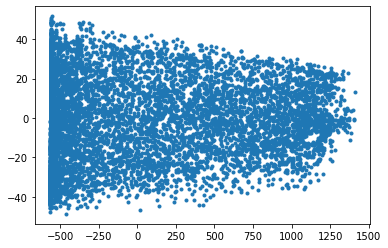

In [22]:
plt.scatter(components[:, 0], components[:, 1], marker='.');

In [23]:
x.shape

(8760, 13)

In [24]:
pca = PCA(n_components=11)
pca.fit(x)

PCA(n_components=11)

In [25]:
pca.explained_variance_ratio_

array([9.98209918e-01, 1.11889745e-03, 5.13943541e-04, 1.15074897e-04,
       2.98746570e-05, 3.39751314e-06, 2.68787197e-06, 2.62775174e-06,
       1.98761000e-06, 9.31924815e-07, 4.51600476e-07])

In [26]:
scalar = StandardScaler()
x = scalar.fit_transform(x)
y = scalar.fit_transform(y.reshape(-1, 1))

In [27]:
y.shape

(8760, 1)

In [28]:
y = y.flatten()

In [29]:
y.shape

(8760,)

In [64]:
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(x)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# xp_train, xp_test, yp_train, yp_test = train_test_split(x_poly, y, test_size=0.2)

In [66]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
pred1 = model.predict(x_train)

In [67]:
print(r2_score(y_test, pred))
print(r2_score(y_train, pred1))

0.5496226800511635
0.5496557063594789


In [68]:
modelp = LinearRegression()
modelp.fit(xp_train, yp_train)
predp = modelp.predict(xp_test)
prep1 = modelp.predict(xp_train)

In [69]:
print(r2_score(yp_test, predp))
print(r2_score(yp_train, prep1))

0.6761586730987283
0.7100149516772927


In [49]:
from sklearn.linear_model import Ridge, Lasso

In [54]:
ridge = Ridge(0.5, max_iter=2000)
ridge.fit(xp_train, yp_train)
predp = ridge.predict(xp_test)
predp1 = ridge.predict(xp_train)

/home/amirhossein/pythonprojects/datascience/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.70616e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [55]:
print(r2_score(yp_test, predp))
print(r2_score(yp_train, predp1))

0.7667016384410722
0.8219106151909057


In [58]:
lasso = Lasso(max_iter=5000)
lasso.fit(xp_train, yp_train)
predp = lasso.predict(xp_test)
predp1 = lasso.predict(xp_train)

/home/amirhossein/pythonprojects/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289540927.2842792, tolerance: 289720.8677212187
  model = cd_fast.enet_coordinate_descent(


In [59]:
print(r2_score(yp_test, predp))
print(r2_score(yp_train, predp1))

0.7896776488143407
0.8046144776348908


In [63]:
model = Sequential()

model.add(Dense(13, input_dim=13))
model.add(Dense(64))
model.add(Dense(13))
model.add(Activation('relu'))
# model.add(Dense(13))
# model.add(Dense(6))
# model.add(Activation('linear'))
model.add(Dense(13))
model.add(Activation('relu'))
# model.add(Dense(13))
# model.add(Dropout(0.1))
# model.add(Activation('linear'))
# model.add(Dense(1))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_43 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_44 (Dense)             (None, 13)                845       
_________________________________________________________________
activation_27 (Activation)   (None, 13)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 13)                182       
_________________________________________________________________
activation_28 (Activation)   (None, 13)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 1)                

In [64]:
model.compile(optimizer='adam', loss='mse', metrics='mse') 

In [65]:
history = model.fit(x_train, y_train, batch_size=2,
                   epochs=30, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/30
3504/3504 [==============================] - 3s 724us/step - loss: 0.3749 - mse: 0.3749 - val_loss: 0.3064 - val_mse: 0.3064
Epoch 2/30
3504/3504 [==============================] - 3s 726us/step - loss: 0.3084 - mse: 0.3084 - val_loss: 0.3078 - val_mse: 0.3078
Epoch 3/30
3504/3504 [==============================] - 5s 1ms/step - loss: 0.2871 - mse: 0.2871 - val_loss: 0.2814 - val_mse: 0.2814
Epoch 4/30
3504/3504 [==============================] - 4s 1ms/step - loss: 0.2678 - mse: 0.2678 - val_loss: 0.2511 - val_mse: 0.2511
Epoch 5/30
3504/3504 [==============================] - 4s 1ms/step - loss: 0.2473 - mse: 0.2473 - val_loss: 0.2400 - val_mse: 0.2400
Epoch 6/30
3504/3504 [==============================] - 5s 1ms/step - loss: 0.2368 - mse: 0.2368 - val_loss: 0.2580 - val_mse: 0.2580
Epoch 7/30
3504/3504 [==============================] - 5s 1ms/step - loss: 0.2289 - mse: 0.2289 - val_loss: 0.2216 - val_mse: 0.2216
Epoch 8/30
3504/3504 [==============================] - 5s

In [66]:
pred = model.predict(x_test)
pred1 = model.predict(x_train)

In [67]:
print(r2_score(y_test, pred))
print(r2_score(y_train, pred1))

0.8214245116073244
0.837683957066515
